# Predictive Modeling - Project - Problem 1

# Importing the Libraries

In [180]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os 
cwd = os.getcwd()
print(cwd)

pd.options.display.max_columns = None
pd.options.display.width=None
pd.options.display.float_format = '{:,.6}'.format

#from tabulate import tabulate
    

D:\Workspace\D-S-B-A\5-PredictiveModeling\Project


## Problem 1

#### 1.1  Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [181]:
df=pd.read_csv('cubic_zirconia.csv')
df = df.drop(['sl-no'], axis=1)

df.columns
df.shape
df.dtypes
df.info()
df.head()
df.describe().T

print('NA Counts ================>>>')
df.isna().sum().sum()
df.isna().sum()

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)



Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'length', 'width',
       'height', 'price'],
      dtype='object')

(26967, 10)

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
length     float64
width      float64
height     float64
price        int64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
carat      26967 non-null float64
cut        26967 non-null object
color      26967 non-null object
clarity    26967 non-null object
depth      26270 non-null float64
table      26967 non-null float64
length     26967 non-null float64
width      26967 non-null float64
height     26967 non-null float64
price      26967 non-null int64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


,carat,cut,color,clarity,depth,table,length,width,height,price
0,0.3,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.7,984
2,0.9,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.8,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


,count,mean,std,min,25%,50%,75%,max
carat,"26,967.0",0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
depth,"26,270.0",61.7451,1.41286,50.8,61.0,61.8,62.5,73.6
table,"26,967.0",57.4561,2.23207,49.0,56.0,57.0,59.0,79.0
length,"26,967.0",5.72985,1.12852,0.0,4.71,5.69,6.55,10.23
width,"26,967.0",5.73357,1.16606,0.0,4.71,5.71,6.54,58.9
height,"26,967.0",3.53806,0.720624,0.0,2.9,3.52,4.04,31.8
price,"26,967.0","3,939.52","4,024.86",326.0,945.0,"2,375.0","5,360.0","18,818.0"


NA Counts ================>>>


697

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
length       0
width        0
height       0
price        0
dtype: int64

Number of duplicate rows = 34


,carat,cut,color,clarity,depth,table,length,width,height,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.8,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.9,5.85,3.66,2898
10500,1.0,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.0,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.9,5.85,3.66,2898


Before (26967, 10)
After (26933, 10)


In [182]:

dff = df[['carat', 'depth', 'table', 'length', 'width', 'height', 'price']]

Q1 = dff.quantile(0.25)
Q3 = dff.quantile(0.75)
IQR = Q3 - Q1

dff.columns
df_items = pd.DataFrame()

df_items['RecCount'] = dff.count()
df_items['Min'] = dff.min()
df_items['Max'] = dff.max()
df_items['Range'] = dff.max() - dff.min()

df_items['Mean'] = dff.mean()
df_items['Median'] = dff.median()
df_items['Q1'] = dff.quantile(0.25)
df_items['Q2'] = dff.quantile(0.50)
df_items['Q3'] = dff.quantile(0.75)
df_items['IQR'] = dff.quantile(0.75) - dff.quantile(0.25)
df_items['Skew'] = dff.skew()
df_items['Kurtosis'] = dff.kurtosis()
df_items['StdDev'] = dff.std()
df_items['Variance'] = dff.var()
df_items['Left3Std'] = df_items['Mean'] - 3 * df_items['StdDev']
df_items['Right3Std'] = df_items['Mean'] + 3 * df_items['StdDev']

df_items['OutlierCount'] = ((dff < (Q1 - 1.5 * IQR)) | (dff > (Q3 + 1.5 * IQR))).sum()

df_items.round(2) 


Index(['carat', 'depth', 'table', 'length', 'width', 'height', 'price'], dtype='object')

,RecCount,Min,Max,Range,Mean,Median,Q1,Q2,Q3,IQR,Skew,Kurtosis,StdDev,Variance,Left3Std,Right3Std,OutlierCount
carat,26933,0.2,4.5,4.3,0.8,0.7,0.4,0.7,1.05,0.65,1.11,1.21,0.48,0.23,-0.63,2.23,657
depth,26236,50.8,73.6,22.8,61.75,61.8,61.0,61.8,62.5,1.5,-0.03,3.68,1.41,1.99,57.51,65.98,1219
table,26933,49.0,79.0,30.0,57.46,57.0,56.0,57.0,59.0,3.0,0.77,1.58,2.23,4.98,50.76,64.15,318
length,26933,0.0,10.23,10.23,5.73,5.69,4.71,5.69,6.55,1.84,0.39,-0.68,1.13,1.27,2.35,9.11,14
width,26933,0.0,58.9,58.9,5.73,5.7,4.71,5.7,6.54,1.83,3.87,160.04,1.17,1.36,2.24,9.23,14
height,26933,0.0,31.8,31.8,3.54,3.52,2.9,3.52,4.04,1.14,2.58,87.42,0.72,0.52,1.38,5.7,22
price,26933,326.0,"18,818.0","18,492.0","3,937.53","2,375.0",945.0,"2,375.0","5,356.0","4,411.0",1.62,2.15,"4,022.55",1.61809e+07,"-8,130.13","16,005.2",1778


In [183]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,"26,933.0",0.79801,0.477237,0.2,0.4,0.7,1.05,4.5
depth,"26,236.0",61.7453,1.41224,50.8,61.0,61.8,62.5,73.6
table,"26,933.0",57.4559,2.23216,49.0,56.0,57.0,59.0,79.0
length,"26,933.0",5.72935,1.12737,0.0,4.71,5.69,6.55,10.23
width,"26,933.0",5.7331,1.16504,0.0,4.71,5.7,6.54,58.9
height,"26,933.0",3.53777,0.719964,0.0,2.9,3.52,4.04,31.8
price,"26,933.0","3,937.53","4,022.55",326.0,945.0,"2,375.0","5,356.0","18,818.0"


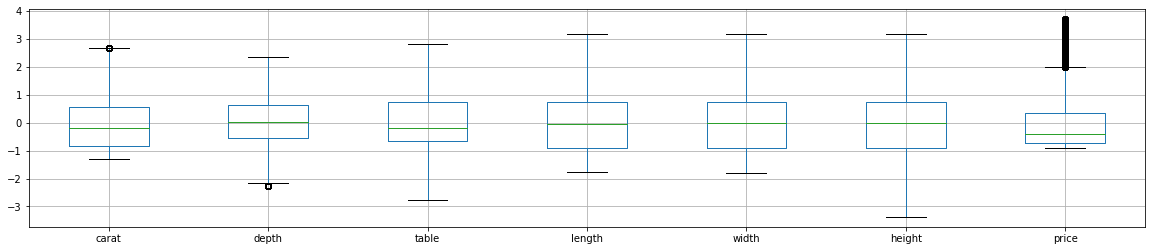

In [255]:
# Scale the data because 
# Carat min and max is 0.2 and 4.5. But other columns are in the bigger range. So we need to scale them to bring them all to the same range
# so that Beta coefficients/weights for each variable 

from scipy.stats import zscore

df_selected = df[['carat', 'depth', 'table', 'length', 'width', 'height', 'price']]

data=df_selected.apply(zscore)
data.boxplot(figsize=(20,4))


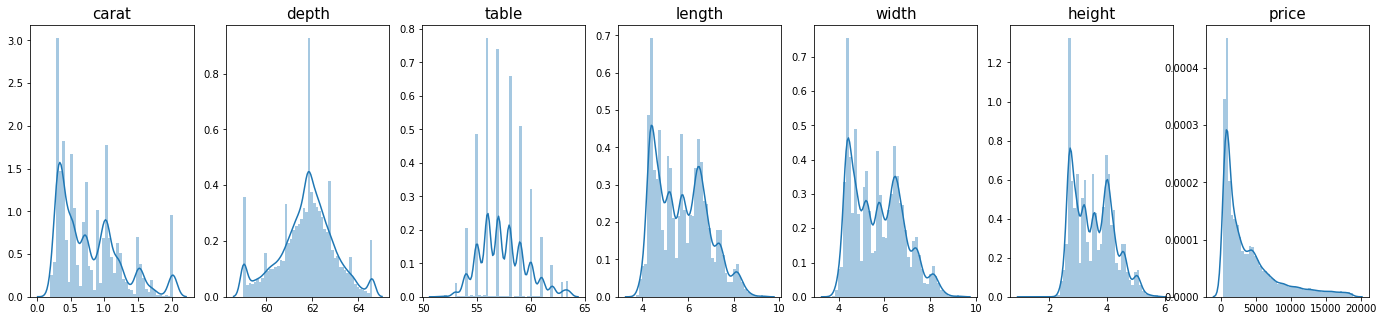

In [256]:
items = ['carat', 'depth', 'table', 'length', 'width', 'height', 'price']

fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(24,5))
i = 0 
for item in items:
    axx=ax[i]
    null = sns.distplot(df[[item]], ax = axx, label=item, hist=True, rug=False).set_title(item, fontsize=15)
    i=i+1

In [ ]:
#sns.pairplot(data=dff)
#sns.pairplot(adult_data , hue='salary' , diag_kind = 'kde')

pp_df = df[['carat', 'depth', 'table', 'length', 'width', 'height', 'price']]

sns.pairplot(pp_df , hue='price', diag_kind = 'kde')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\transforms.py:2832: RuntimeWarning: overflow encountered in double_scalars
  elif vmax - vmin <= maxabsvalue * tiny:
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2477: RuntimeWarning: overflow encountered in double_scalars
  delta = (x1t - x0t) * margin


#### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [186]:
# Length width and height columns have 0 values. But because we are talking about features of a stone/diamond. That seems like an impossible scenario. 
# We check for how many records have zeros in each column.
(df['length'] == 0).sum()
(df['width'] == 0).sum()
(df['height'] == 0).sum()
df.shape


2

2

8

(26933, 10)

In [187]:
df = df[df.length != 0]
df = df[df.width != 0]
df = df[df.height != 0]
df.shape

(26925, 10)

In [188]:
# Impute NaN values in depth column with Median. We use median because we have treated the column for outliers. 
df[df['depth'].isna()]
for column in df[['depth']]:
    median = dff[column].median()
    df[column] = df[column].fillna(median)
df[df['depth'].isna()]
df.isna().sum().sum()

,carat,cut,color,clarity,depth,table,length,width,height,price
26,0.34,Ideal,D,SI1,nan,57.0,4.5,4.44,2.74,803
86,0.74,Ideal,E,SI2,nan,59.0,5.92,5.97,3.52,2501
117,1.0,Premium,F,SI1,nan,59.0,6.4,6.36,4.0,5292
148,1.11,Premium,E,SI2,nan,61.0,6.66,6.61,4.09,4177
163,1.0,Very Good,F,VS2,nan,55.0,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...,...
26848,1.22,Very Good,H,VS1,nan,59.0,6.91,6.85,4.29,7673
26854,1.29,Premium,I,VS2,nan,58.0,7.12,7.03,4.27,6321
26879,0.51,Very Good,E,SI1,nan,58.0,5.1,5.13,3.12,1343
26923,0.51,Ideal,D,VS2,nan,57.0,5.12,5.09,3.18,1882


,carat,cut,color,clarity,depth,table,length,width,height,price


0

In [189]:
# Treat all numeric for outliers. Replace outliers with lower/upper IQR values
# Function to calculate lower_range and upper_range IQR Values
def get_whiskers(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [190]:
# Treat for outliers in all continuous variables. No Outlier treatment for dependent/output variable.  
for feature in df[['carat', 'depth', 'table', 'length', 'width', 'height']]: 
    lr,ur=get_whiskers(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

In [191]:
df.shape
df.head()

(26925, 10)

,carat,cut,color,clarity,depth,table,length,width,height,price
0,0.3,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.7,984
2,0.9,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.8,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


#### 1.3) Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

In [192]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           779
Good          2434
Very Good     6027
Premium       6880
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4091
F    4722
E    4916
G    5650
Name: color, dtype: int64


CLARITY :  8
I1       362
IF       891
VVS1    1839
VVS2    2530
VS1     4086
SI2     4561
VS2     6092
SI1     6564
Name: clarity, dtype: int64




In [193]:
df['cut'] = df['cut'].map({'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5})

In [194]:
df['color'] = df['color'].map({'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1})

In [195]:
df['clarity'] = df['clarity'].map({'FL': 11, 'IF': 10, 'VVS1': 9, 'VVS2': 8, 'VS1': 7, 'VS2': 6, 'SI1': 5, 'SI2': 4, 'I1': 3, 'I2': 2, 'I3': 1})

In [196]:
df.head()
df.dtypes
df.info()

,carat,cut,color,clarity,depth,table,length,width,height,price
0,0.3,5,6,5,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,10,60.8,58.0,4.42,4.46,2.7,984
2,0.9,3,6,8,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,5,7,61.6,56.0,4.82,4.8,2.96,1082
4,0.31,5,5,9,60.4,59.0,4.35,4.43,2.65,779


carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
length     float64
width      float64
height     float64
price        int64
dtype: object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
carat      26925 non-null float64
cut        26925 non-null int64
color      26925 non-null int64
clarity    26925 non-null int64
depth      26925 non-null float64
table      26925 non-null float64
length     26925 non-null float64
width      26925 non-null float64
height     26925 non-null float64
price      26925 non-null int64
dtypes: float64(6), int64(4)
memory usage: 2.3 MB


In [258]:

dff.corr().round(4)

def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

mosthighlycorrelated(df, 10).round(3)

,carat,depth,table,length,width,height,price
carat,1.0,0.0352,0.1815,0.9769,0.9414,0.941,0.9224
depth,0.0352,1.0,-0.2978,-0.0184,-0.0245,0.102,-0.0029
table,0.1815,-0.2978,1.0,0.1963,0.1824,0.149,0.1268
length,0.9769,-0.0184,0.1963,1.0,0.9626,0.9565,0.8866
width,0.9414,-0.0245,0.1824,0.9626,1.0,0.9287,0.8564
height,0.941,0.102,0.149,0.9565,0.9287,1.0,0.8507
price,0.9224,-0.0029,0.1268,0.8866,0.8564,0.8507,1.0


,FirstVariable,SecondVariable,Correlation
0,length,width,0.998
1,length,height,0.991
2,width,height,0.991
3,carat,length,0.983
4,carat,width,0.982
5,carat,height,0.981
6,carat,price,0.923
7,width,price,0.889
8,length,price,0.887
9,height,price,0.882


In [259]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
non_objects=df.select_dtypes(exclude=['object', 'category']).columns

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df[non_objects].values, i) for i in range(df[non_objects].shape[1])]
vif["features"] = df[non_objects].columns

vif.round(1)

,VIF Factor,features
0,242.0,carat
1,17.7,cut
2,10.3,color
3,24.5,clarity
4,"1,266.7",depth
5,872.8,table
6,"10,819.1",length
7,"9,515.2",width
8,"3,392.3",height
9,23.7,price


In [199]:
df_safe = df

#### Modeling

In [200]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [201]:
df= df_safe
df['price'].isnull().values.any()

False

In [236]:
from scipy.stats import zscore
df= df_safe
#df['price'] = df['price'].astype(np.float64)
df_scaled = df.apply(zscore)


#items = ['carat', 'depth', 'table', 'length', 'width', 'height', 'price']
#df_scaled[['carat']] = df_scaled[['carat']].apply(zscore)

x=df_scaled.drop(['price'], axis=1) #name is splitted in Model and Brand; Year is transformed to CarAge
#x=df_scaled.drop(['price', 'width', 'height'], axis=1) #name is splitted in Model and Brand; Year is transformed to CarAge
y=df_scaled.price
x.head()
y.head()




,carat,cut,color,clarity,depth,table,length,width,height
0,-1.06738,0.979367,0.940777,-0.640136,0.286766,0.261968,-1.29653,-1.28966,-1.26156
1,-1.00245,0.0809799,-0.231548,2.39645,-0.780365,0.261968,-1.16325,-1.13753,-1.20406
2,0.231349,-0.817407,0.940777,1.18181,0.368853,1.18933,0.276134,0.347964,0.348406
3,-0.807636,0.979367,0.354615,0.574498,-0.123669,-0.66539,-0.807849,-0.833272,-0.830318
4,-1.04574,0.979367,0.354615,1.78913,-1.10871,0.725647,-1.22545,-1.16438,-1.27593


0   -0.854844
1   -0.734225
2    0.585129
3   -0.709852
4   -0.785208
Name: price, dtype: float64

In [237]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123,test_size=0.30)

x_train.shape
y_train.shape

x_test.shape
y_test.shape

x_train.dtypes
y_train.dtypes

x_test.dtypes
y_test.dtypes

(18847, 9)

(18847,)

(8078, 9)

(8078,)

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
table      float64
length     float64
width      float64
height     float64
dtype: object

dtype('float64')

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
table      float64
length     float64
width      float64
height     float64
dtype: object

dtype('float64')

In [238]:
from scipy.stats import zscore
#ss=StandardScaler() 
# we are scaling the data for ANN and Linear Regression Without scaling it will give very poor results. Computations becomes easier
#x_train_scaled=ss.fit_transform(x_train)
#x_test_scaled=ss.transform(x_test)
df.info()
#x_train_scaled  = x_train.apply(zscore)
#x_test_scaled = x_test.apply(zscore)
#y_train_scaled = y_train.apply(zscore)
#y_test_scaled = y_test.apply(zscore)

x_train_scaled = x_train
x_test_scaled = x_test
y_train_scaled = y_train
y_test_scaled = y_test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
carat      26925 non-null float64
cut        26925 non-null int64
color      26925 non-null int64
clarity    26925 non-null int64
depth      26925 non-null float64
table      26925 non-null float64
length     26925 non-null float64
width      26925 non-null float64
height     26925 non-null float64
price      26925 non-null int64
dtypes: float64(6), int64(4)
memory usage: 2.3 MB


In [239]:
regression_model = LinearRegression()
regression_model.fit(x_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [240]:
intercept = regression_model.intercept_

print("The intercept is {}".format(intercept))

The intercept is 0.0020255671392525277


#### R Square and Adj. R Square

In [253]:
# R square on training data
r_square = regression_model.score(x_train_scaled, y_train_scaled)

#n is the sample size
#p is the total number of explanatory variables
p=8
n=18847
adj_r_square = 1-(1-r_square)*(n-1)/(n-p-1)

print('R Square : %.4f' % r_square, '    ', 'Adj. R Square : %.4f' % adj_r_square)

R Square : 0.9185      Adj. R Square : 0.9185


In [254]:
# R square on testing data
r_square = regression_model.score(x_test_scaled, y_test_scaled)

#n is the sample size
#p is the total number of explanatory variables
p=8
n=18847
adj_r_square = 1-(1-r_square)*(n-1)/(n-p-1)

print('R Square : %.4f' % r_square, '    ', 'Adj. R Square : %.4f' % adj_r_square)

R Square : 0.9140      Adj. R Square : 0.9140


#### RMSE

In [244]:
# Calculate MSE
import math
mse = np.mean((regression_model.predict(x_train_scaled)-y_train_scaled)**2)
math.sqrt(mse)

np.sqrt(mean_squared_error(y_train_scaled,regression_model.predict(x_train_scaled)))

np.sqrt(mean_squared_error(y_test_scaled,regression_model.predict(x_test_scaled)))

0.2868021047016785

0.28680210470167783

0.2899312522504168

In [210]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single datafr
from scipy.stats import zscore

#X_train_scaled  = X_train.apply(zscore)
#X_test_scaled = X_test.apply(zscore)
#y_train_scaled = y_train.apply(zscore)
#y_test_scaled = y_test.apply(zscore)

data_train = pd.concat([x_train, y_train], axis=1)
#data_train_scaled = data_train.apply(zscore)
data_train_scaled = data_train
data_train_scaled.head()

,carat,cut,color,clarity,depth,table,length,width,height,price
11547,-0.634472,-0.817407,0.354615,-0.640136,-0.452017,1.65301,-0.594606,-0.564809,-0.614698,-0.66807
4813,0.620968,0.979367,-0.231548,1.78913,-0.123669,-0.66539,0.7737,0.822249,0.779646,1.09695
19486,-0.591181,-0.817407,0.354615,-1.24745,0.45094,1.18933,-0.559066,-0.537963,-0.4997,-0.71607
9126,-0.569535,0.979367,1.52694,-0.640136,0.368853,-0.66539,-0.4791,-0.448475,-0.427827,-0.573316
19748,0.880715,0.979367,-0.231548,1.78913,0.368853,-0.201711,0.924747,0.965429,0.980892,1.26159


In [227]:
# Fit the OLS model and get the params
import statsmodels.formula.api as smf
lm = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+length+width+height', data = data_train).fit()
lm = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+length', data = data_train).fit()
#lm = smf.ols(formula= 'price ~ length+cut+color+clarity+depth+table', data = data_train).fit()
lm.params
print(lm.summary())

Intercept    0.0019768
carat          1.57768
cut          0.0374779
color         0.138064
clarity       0.196226
depth       -0.0381251
table       -0.0172626
length       -0.542971
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 3.004e+04
Date:                Sat, 16 May 2020   Prob (F-statistic):               0.00
Time:                        13:35:21   Log-Likelihood:                -3288.8
No. Observations:               18847   AIC:                             6594.
Df Residuals:                   18839   BIC:                             6656.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0020      0.002      0.942      0.3

In [212]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 2.359e+04
Date:                Sat, 16 May 2020   Prob (F-statistic):               0.00
Time:                        13:29:09   Log-Likelihood:                -3203.5
No. Observations:               18847   AIC:                             6427.
Df Residuals:                   18837   BIC:                             6506.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0020      0.002      0.969      0.3

#### 1.4) Inference: Basis on these predictions, what are the business insights and recommendations.	6

In [18]:
###############################################################################################################################